In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gc

In [3]:
# # Lecture du fichier parquet
df = pd.read_parquet("data/user_stats_df_output.parquet")
# # Calcul du nombre total d'achats en utilisant la valeur totale des achats divisée par le prix moyen sur 7 mois
# df['total_purchases'] = df['total_purchase_value'] / df['avg_price_7m']
# df['total_purchases'] = df['total_purchases'].fillna(0).astype(int)  # Conversion en entier et gestion des NaN
# # Calcul du taux de conversion en pourcentage
# df['conversion_rate'] = np.where(df['number_of_carts_7m'] > 0, df['total_purchases'] / df['number_of_carts_7m'], 0)
# # Supposons une période d'observation de 30 jours (1 mois environ)
# observation_period_days = 30
# df['purchase_frequency'] = df['total_purchases'] / observation_period_days
# # Calcul de la valeur moyenne d'achat, évite la division par zéro en utilisant np.where
# df['avg_purchase_value'] = np.where(df['total_purchases'] > 0, df['total_purchase_value'] / df['total_purchases'], 0)

# # Calcul d'un score de fidélité simplifié
# df['loyalty_score'] = (df['purchase_frequency'] * 0.8) + (df['avg_purchase_value'] * 0.3) - (df['days_since_last_purchase'] * 0.1)


In [3]:
# Sélection des variables pour le clustering
variables_pour_clustering = [
    'number_of_views_7m',
    'number_of_sessions_7m',
    #'loyalty_score',
    'total_purchase_value',
    # 'conversion_rate'
]

# Filtrer le DataFrame pour ne garder que ces variables
X = df[variables_pour_clustering]

# Suppression des lignes avec des valeurs manquantes
# X = X.dropna()

In [4]:
# X.shape 

(84864, 3)

# Détermination eps

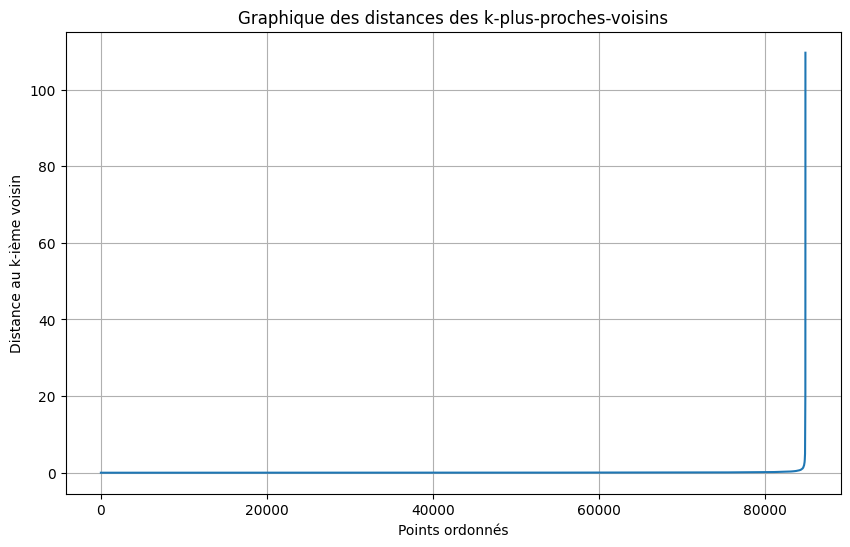

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_parquet("data/user_stats_df_output.parquet")


# Sélection des variables pour le clustering
variables_pour_clustering = [
    'number_of_views_7m',
    'number_of_sessions_7m',
    #'loyalty_score',
    'total_purchase_value',
    # 'conversion_rate'
]

# Filtrer le DataFrame pour ne garder que ces variables
X = df[variables_pour_clustering]

# Suppression des lignes avec des valeurs manquantes
X = X.dropna()

# Supposons que df soit votre DataFrame contenant les données
# Sélection des variables pertinentes pour le clustering
variables_pour_clustering = [
    'number_of_views_7m',
    'number_of_sessions_7m',
    'total_purchase_value'
]

# Filtrer le DataFrame pour ne garder que ces variables
X = df[variables_pour_clustering]

# Suppression des lignes avec des valeurs manquantes
X = X.dropna()

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcul des distances des k-plus-proches-voisins
k = 10  # Choix de k basé sur min_samples envisagé
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)

# Trier les distances du k-ième voisin pour estimer l'épaule
distances = np.sort(distances[:, k-1], axis=0)  # Prendre la distance du k-ième voisin
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("Graphique des distances des k-plus-proches-voisins")
plt.xlabel("Points ordonnés")
plt.ylabel("Distance au k-ième voisin")
plt.grid(True)
plt.show()


(84864, 3)
eps: 0.65, min_samples: 4, clusters: 2, noise points: 144
Silhouette Score: 0.84
eps: 0.65, min_samples: 5, clusters: 2, noise points: 153
Silhouette Score: 0.85
eps: 0.65, min_samples: 6, clusters: 2, noise points: 164
Silhouette Score: 0.71
eps: 0.70, min_samples: 4, clusters: 2, noise points: 124
Silhouette Score: 0.84
eps: 0.70, min_samples: 5, clusters: 2, noise points: 133
Silhouette Score: 0.84
eps: 0.70, min_samples: 6, clusters: 1, noise points: 147
eps: 0.75, min_samples: 4, clusters: 2, noise points: 117
Silhouette Score: 0.84
eps: 0.75, min_samples: 5, clusters: 2, noise points: 120
Silhouette Score: 0.84
eps: 0.75, min_samples: 6, clusters: 1, noise points: 136
Meilleur eps: 0.65, Meilleur min_samples: 5, Meilleur Score Silhouette: 0.85


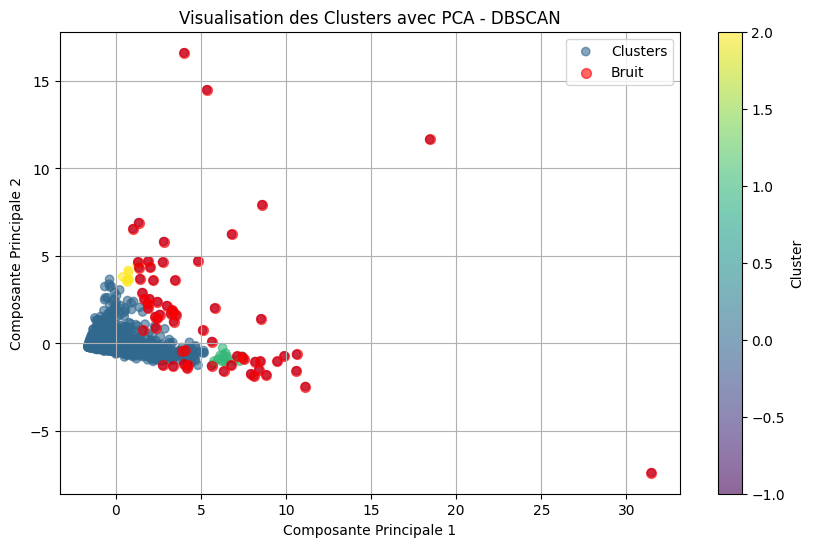

6639

In [6]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import gc



# Sélectionner les variables pertinentes pour le clustering
variables_pour_clustering = [
    'number_of_views_7m',
    'number_of_sessions_7m',
    'total_purchase_value'
]

# Filtrer le DataFrame pour ne garder que ces variables et supprimer les valeurs manquantes
X = df[variables_pour_clustering].dropna()

# Vérifier la taille des données
print(X.shape)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Limitez la taille des données pendant le test des paramètres pour éviter les crashs
sample_size = min(10000, len(X_scaled))  # Limite à 10 000 points ou moins pour tester plus facilement
X_sample = X_scaled[:sample_size]

eps_values = [0.65, 0.7, 0.75]  # Exploration autour de la meilleure valeur trouvée
min_samples_values = [4, 5, 6]  # Test de valeurs autour de 5 pour ajuster finement



best_score = -1
best_eps = None
best_min_samples = None

# Tester plusieurs combinaisons de paramètres
for eps in eps_values:
    for min_samples in min_samples_values:
        try:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X_sample)
            num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
            num_noise = list(clusters).count(-1)
            print(f"eps: {eps:.2f}, min_samples: {min_samples}, clusters: {num_clusters}, noise points: {num_noise}")

            # Calculer le score silhouette si plusieurs clusters sont trouvés
            if num_clusters > 1:
                score = silhouette_score(X_sample[clusters != -1], clusters[clusters != -1])
                print(f"Silhouette Score: {score:.2f}")

                # Mémoriser les meilleurs paramètres
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples

            # Nettoyer la mémoire après chaque itération
            gc.collect()

        except Exception as e:
            print(f"Erreur avec eps={eps:.2f}, min_samples={min_samples}: {e}")

# Si aucun score valide n'est trouvé, définir des valeurs par défaut
if best_eps is None or best_min_samples is None:
    print("Aucun score silhouette valide trouvé, utilisation des valeurs par défaut.")
    best_eps = 1.5
    best_min_samples = 3

print(f"Meilleur eps: {best_eps}, Meilleur min_samples: {best_min_samples}, Meilleur Score Silhouette: {best_score:.2f}")

# Appliquer DBSCAN avec les meilleurs paramètres trouvés
# Limiter à un échantillon pour éviter le crash du noyau
try:
    visual_sample_size = 2000  # Réduire la taille à 2000 points pour la visualisation
    X_scaled_visual = X_scaled[:visual_sample_size]  # Restreindre l'échantillon pour DBSCAN
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    clusters = dbscan.fit_predict(X_scaled_visual)

    # Visualisation des clusters avec PCA
    X_pca = PCA(n_components=2).fit_transform(X_scaled_visual)
    clusters_sample = clusters

    # Visualiser les clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_sample, cmap='viridis', alpha=0.6, label='Clusters')
    plt.scatter(X_pca[clusters_sample == -1, 0], X_pca[clusters_sample == -1, 1], c='red', s=50, alpha=0.6, label='Bruit')
    plt.title('Visualisation des Clusters avec PCA - DBSCAN')
    plt.xlabel('Composante Principale 1')
    plt.ylabel('Composante Principale 2')
    plt.colorbar(scatter, label='Cluster')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Erreur lors de l'application de DBSCAN et de la visualisation : {e}")

# Nettoyer la mémoire après l'exécution
gc.collect()



In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gc

(84864, 3)
eps: 0.640, min_samples: 4, clusters: 3, noise points: 28, Silhouette Score: 0.61
eps: 0.645, min_samples: 6, clusters: 2, noise points: 67, Silhouette Score: 0.68
eps: 0.650, min_samples: 4, clusters: 2, noise points: 45, Silhouette Score: 0.73
eps: 0.650, min_samples: 5, clusters: 2, noise points: 43, Silhouette Score: 0.74
Meilleur eps: 0.65, Meilleur min_samples: 5, Meilleur Score Silhouette: 0.74


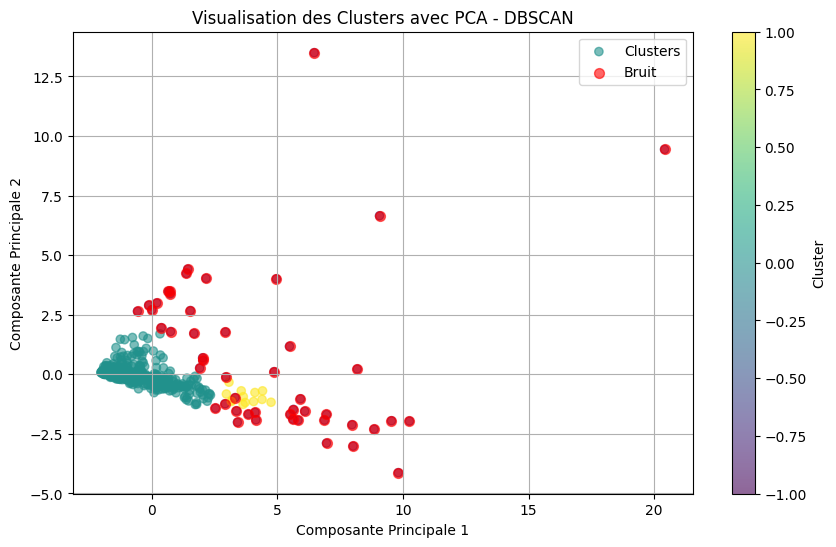

6775

In [6]:




# Sélectionner les variables pertinentes pour le clustering
variables_pour_clustering = [
    'number_of_views_7m',
    'number_of_sessions_7m',
    'total_purchase_value'
]

# Filtrer le DataFrame pour ne garder que ces variables et supprimer les valeurs manquantes
X = df[variables_pour_clustering].dropna()

# Vérifier la taille des données
print(X.shape)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Limiter la taille des données pendant le test des paramètres pour éviter les crashs
sample_size = min(1500, len(X_scaled))  # Réduire encore plus à 1500 points
X_sample = X_scaled[:sample_size]

# Affiner les plages de valeurs pour `eps` autour de 0.65 avec de petits pas
eps_values = np.arange(0.64, 0.68, 0.005)  # Intervalle ajusté autour de 0.66
min_samples_values = [4, 5, 6]  # Ajustement des min_samples autour de 5


best_score = -1
best_eps = None
best_min_samples = None

# Boucle pour tester les combinaisons des paramètres sur un échantillon réduit
for eps in eps_values:
    for min_samples in min_samples_values:
        try:
            # Sous-échantillonnage aléatoire pour chaque itération
            random_indices = np.random.choice(len(X_sample), size=1000, replace=False)
            X_subset = X_sample[random_indices]

            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X_subset)
            num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclut le bruit
            num_noise = list(clusters).count(-1)

            # Calcul du score silhouette seulement s'il y a au moins 2 clusters
            if num_clusters > 1:
                score = silhouette_score(X_subset[clusters != -1], clusters[clusters != -1])

                # Affichage limité des meilleurs résultats pour éviter la surcharge
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    print(f"eps: {eps:.3f}, min_samples: {min_samples}, clusters: {num_clusters}, noise points: {num_noise}, Silhouette Score: {score:.2f}")

            # Libération de mémoire après chaque itération
            gc.collect()
        except Exception as e:
            print(f"Erreur avec eps={eps}, min_samples={min_samples}: {e}")

# Affichage des meilleurs paramètres
print(f"Meilleur eps: {best_eps}, Meilleur min_samples: {best_min_samples}, Meilleur Score Silhouette: {best_score:.2f}")

# Application de DBSCAN avec les meilleurs paramètres trouvés sur un échantillon encore plus petit
try:
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    clusters = dbscan.fit_predict(X_scaled[:500])  # Appliquer DBSCAN sur un échantillon encore plus réduit pour la visualisation

    # Visualisation des clusters avec PCA
    X_pca = PCA(n_components=2).fit_transform(X_scaled[:500])  # Limitation à 500 points
    clusters_sample = clusters[:500]

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_sample, cmap='viridis', alpha=0.6, label='Clusters')
    plt.scatter(X_pca[clusters_sample == -1, 0], X_pca[clusters_sample == -1, 1], c='red', s=50, alpha=0.6, label='Bruit')
    plt.title('Visualisation des Clusters avec PCA - DBSCAN')
    plt.xlabel('Composante Principale 1')
    plt.ylabel('Composante Principale 2')
    plt.colorbar(scatter, label='Cluster')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Erreur lors de l'application de DBSCAN et de la visualisation : {e}")

# Nettoyer la mémoire après l'exécution pour éviter le blocage
gc.collect()




